# pumpkin seeds analysis

Citation Request :
KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0

https://link.springer.com/article/10.1007/s10722-021-01226-0
https://link.springer.com/content/pdf/10.1007/s10722-021-01226-0.pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows = 100

In [114]:
# Load the Dataset
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

In [115]:
df.head(3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik


In [116]:
df.shape

(2500, 13)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [118]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area,2500.0,80658.220800,13664.510228,47939.0000,70765.000000,79076.00000,89757.500000,136574.0000
Perimeter,2500.0,1130.279015,109.256418,868.4850,1048.829750,1123.67200,1203.340500,1559.4500
Major_Axis_Length,2500.0,456.601840,56.235704,320.8446,414.957850,449.49660,492.737650,661.9113
Minor_Axis_Length,2500.0,225.794921,23.297245,152.1718,211.245925,224.70310,240.672875,305.8180
Convex_Area,2500.0,81508.084400,13764.092788,48366.0000,71512.000000,79872.00000,90797.750000,138384.0000
Equiv_Diameter,2500.0,319.334230,26.891920,247.0584,300.167975,317.30535,338.057375,417.0029
Eccentricity,2500.0,0.860879,0.045167,0.4921,0.831700,0.86370,0.897025,0.9481
Solidity,2500.0,0.989492,0.003494,0.9186,0.988300,0.99030,0.991500,0.9944
Extent,2500.0,0.693205,0.060914,0.4680,0.658900,0.71305,0.740225,0.8296
Roundness,2500.0,0.791533,0.055924,0.5546,0.751900,0.79775,0.834325,0.9396


In [119]:
df.Class.value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [120]:
class_map = {'Çerçevelik':1, 'Ürgüp Sivrisi':0}

In [121]:
df.Class = df.Class.map(class_map)

In [122]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,1
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,1
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,1
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,1
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,1


In [123]:
X = df.drop('Class',axis=1)
y = df['Class']

In [124]:
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359


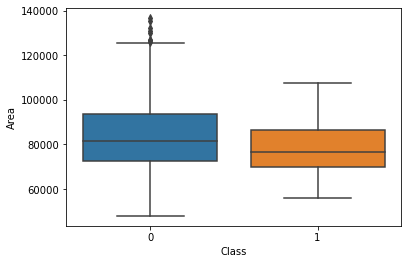

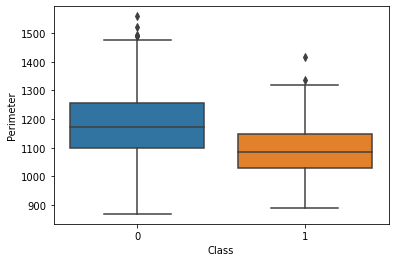

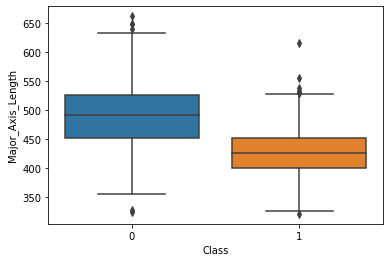

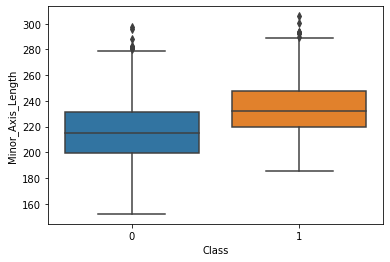

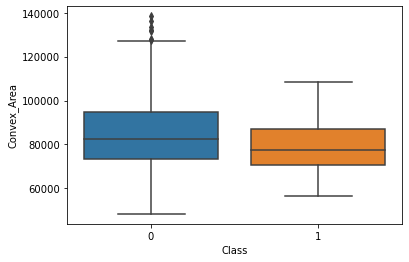

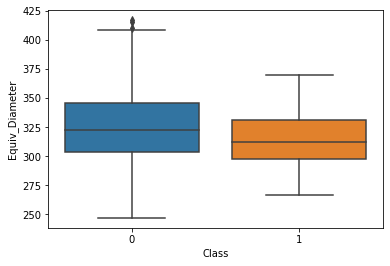

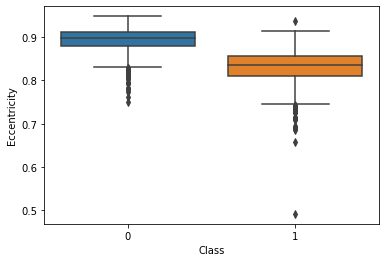

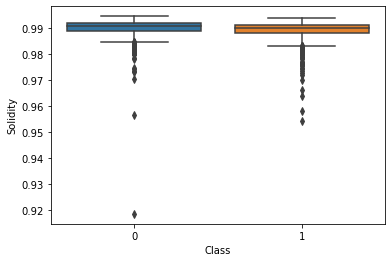

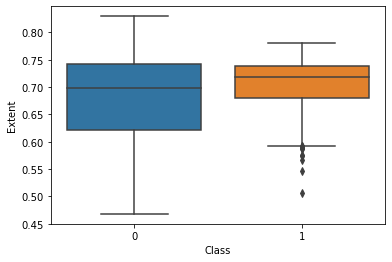

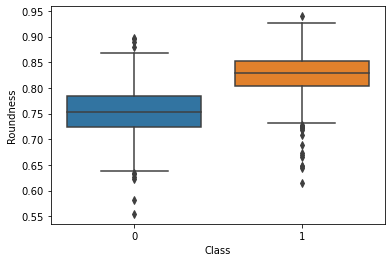

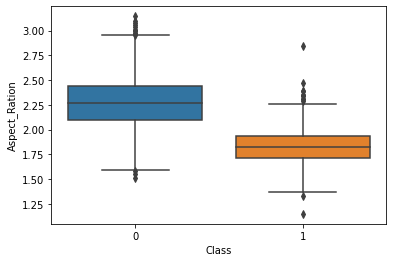

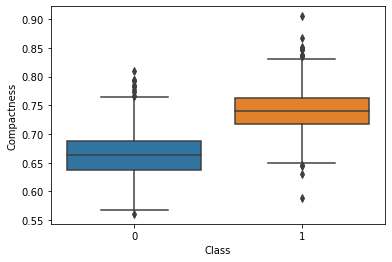

In [125]:
for col in X.columns:
    sns.boxplot(x='Class',y=col,data=df)
    plt.show()

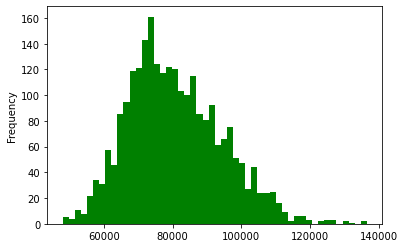

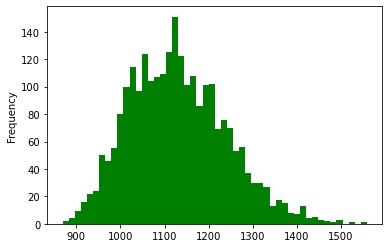

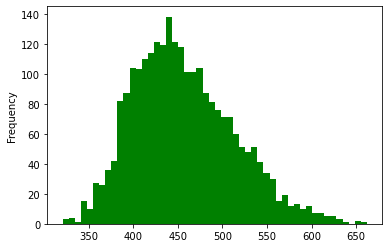

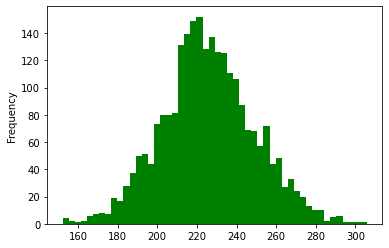

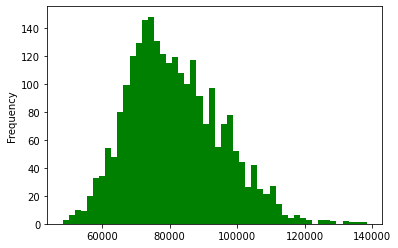

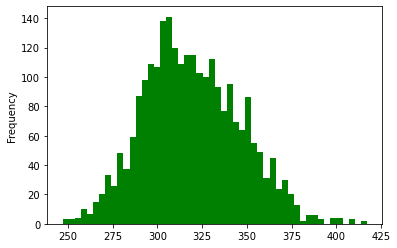

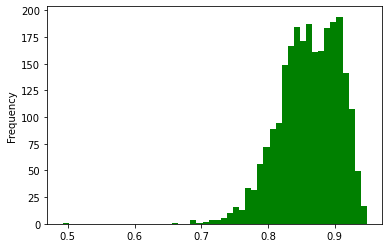

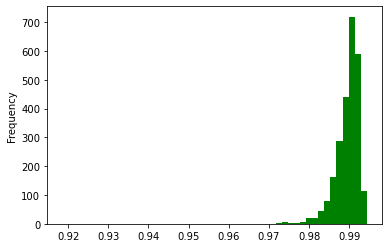

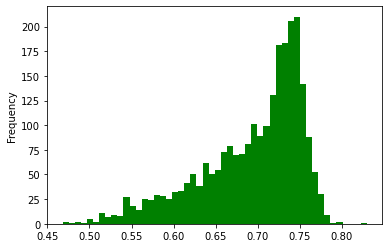

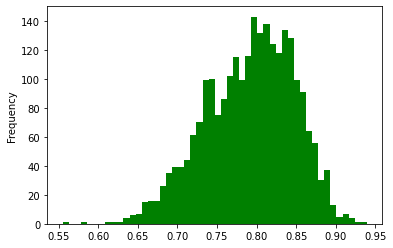

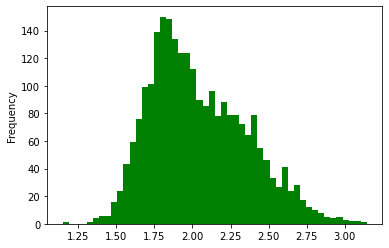

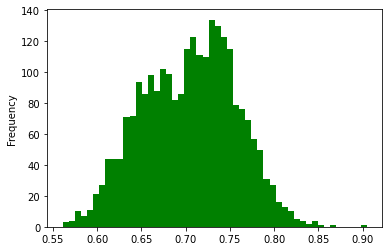

In [131]:
for col in X.columns:
    df[col].plot(kind='hist',bins=50,color ='green')
    plt.show()

In [132]:
#both class are having nearly same amount of outlier

<AxesSubplot:>

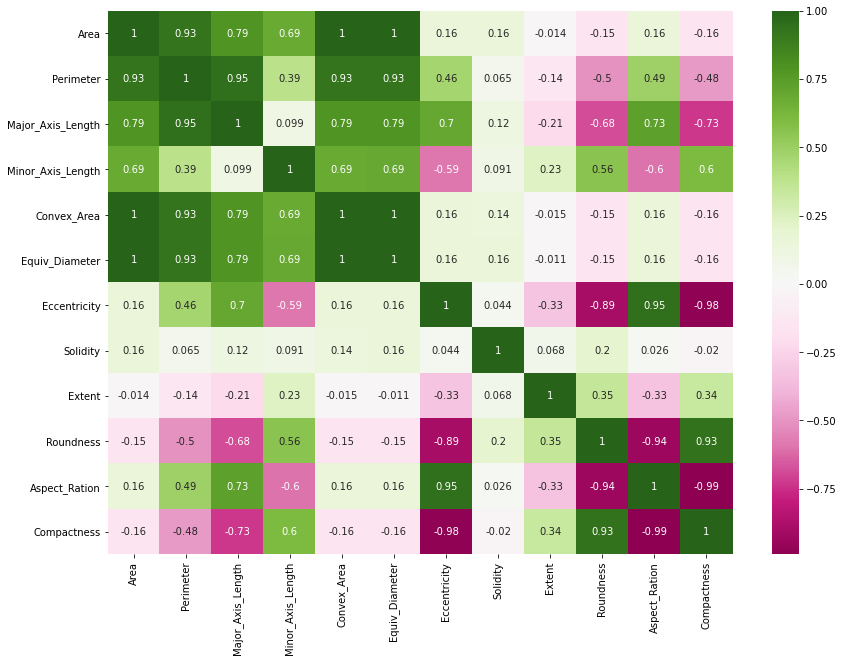

In [133]:
plt.figure(figsize=(14,10))
sns.heatmap(X.corr(),annot=True,cmap='PiYG')

As seen in the correlation plot, we can conclude

Area feature has a very high correlation with Convex_Area and Equiv_Diameter features
Eccentricity and Aspect_Ration have a high correlation
Major_Axis_length has a high correlation with Perimeter.
We will try to train model after dropping the features of Convex_Area and Solidity

In [134]:
X = X.drop(['Convex_Area','Solidity'],axis=1)

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [136]:
X = scaler.fit_transform(X)
X

array([[-1.78470346, -2.21575484, -2.32022415, ...,  1.8737626 ,
        -1.77506344,  2.19727996],
       [-0.29478016, -0.56880361, -0.70091635, ...,  0.93837685,
        -0.82486401,  0.84023019],
       [-0.66135033, -0.43294002, -0.36939513, ..., -0.43161453,
         0.07405883, -0.21148339],
       ...,
       [ 0.53695644,  0.7326892 ,  0.90028724, ..., -0.65517709,
         0.76312751, -0.83346454],
       [-0.04737457,  0.48215494,  0.8057821 , ..., -1.30619127,
         1.29646729, -1.28581446],
       [ 0.31297387,  0.27147071,  0.11193101, ...,  0.0316071 ,
        -0.21587543,  0.1183551 ]])

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [138]:
X.shape,y.shape

((2500, 10), (2500,))

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2000, 10), (500, 10), (2000,), (500,))

Importing necessary Libraries

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [142]:
#Creating a function to run all models

In [143]:
def run_model(model):
    model.fit(X_train,y_train)
    x_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train,x_pred)
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test,y_pred)
    print("The train accuracy_score  is :",acc_test)
    print("The test accuracy_score is :",acc_test)

## LogisticRegression

In [144]:
model = LogisticRegression()
run_model(model)

The train accuracy_score  is : 0.836
The test accuracy_score is : 0.836


## DecisionTreeClassifier

In [145]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [146]:
model = DecisionTreeClassifier(max_depth=5)
run_model(model)

The train accuracy_score  is : 0.84
The test accuracy_score is : 0.84


## RandomForestClassifier

In [147]:
model = RandomForestClassifier()
run_model(model)

The train accuracy_score  is : 0.85
The test accuracy_score is : 0.85


In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
clf = RandomForestClassifier()
parametrs = { 'n_estimators': [20,50,100],
              'max_depth': [6,8,10],
              'min_samples_split': [6,8,10] }
grid = GridSearchCV(clf, parametrs, cv=5)
run_model(grid)

The train accuracy_score  is : 0.86
The test accuracy_score is : 0.86


In [150]:
grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_split=10)

RandomForestClassifier with max_depth=8, min_samples_split=10 works fine

## Support Vector Classifier

In [151]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [152]:
# kernel : default='rbf'

In [153]:
model = SVC(kernel='linear')
run_model(model)

The train accuracy_score  is : 0.852
The test accuracy_score is : 0.852


In [154]:
model = SVC(kernel='rbf')
run_model(model)

The train accuracy_score  is : 0.846
The test accuracy_score is : 0.846


Since our Dataset has outliers so apply high Penalty(i.e C value)

In [155]:
clf = SVC()
parametrs = { 'kernel': ['linear','rbf'],
              'C':[1,100,1000] }
grid = GridSearchCV(clf, parametrs, cv=5)
run_model(grid)

The train accuracy_score  is : 0.856
The test accuracy_score is : 0.856


In [156]:
grid.best_estimator_

SVC(C=1000, kernel='linear')

Linear Kernel works better with a penalty of 1000

# Thank you